In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
IMAGE_SIZE=720
BATCH_SIZE=16
CHANNELS =3
EPOCHS=100
data=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/project lung cancer/dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 681 files belonging to 2 classes.


In [ ]:
train_size = 0.8
len(data)*train_size
train_ds=data.take(34)
test_ds=data.skip(34)
val_size=0.1
len(data)*val_size
val_ds=test_ds.take(4)
len(val_ds)
test_ds=test_ds.skip(4)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/project lung cancer/model/1")

In [ ]:
import numpy as np

In [ ]:
class_names=data.class_names

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

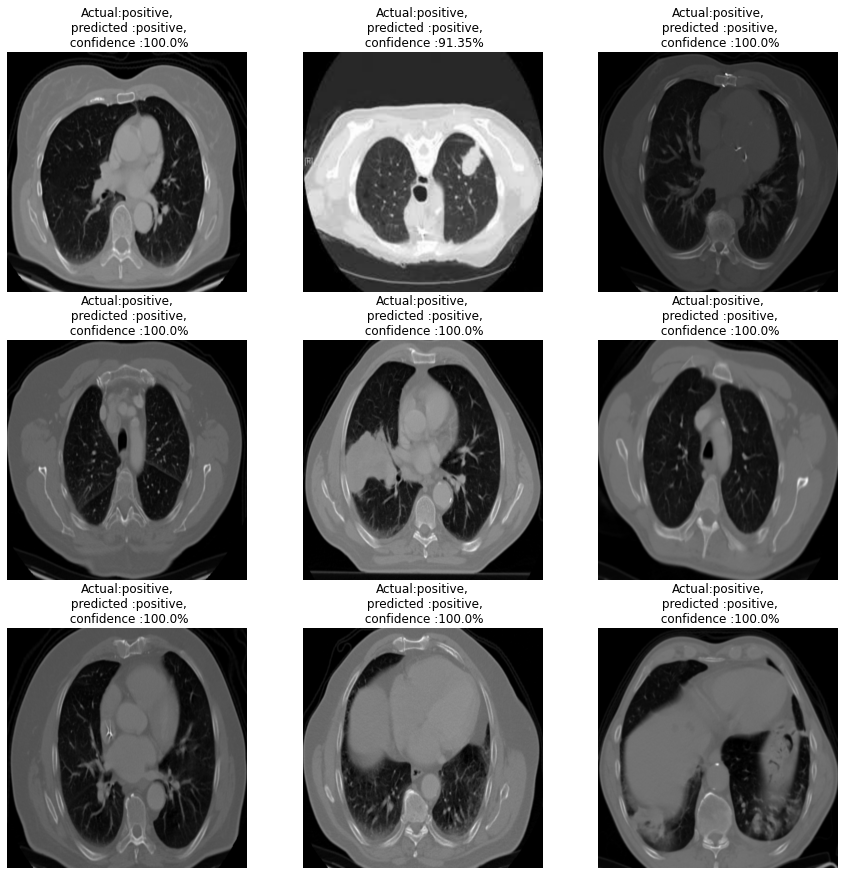

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9) :
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n predicted :{predicted_class},\n confidence :{confidence}%")
        plt.axis("off")